# Analyzing and Predicting Daniel's Ricciardo F1 Performance Using Machine Learning  

Import the required Python libraries and have a look at the data.

In [379]:
# Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Look at 5 first rows of "points" dataframe
points = pd.read_csv('points.csv')
points.head()

,Year,Circuit,Points received,Team
0,2014,Australia,0,Red Bull
1,2014,Malaysia,0,Red Bull
2,2014,Bahrain,12,Red Bull
3,2014,China,12,Red Bull
4,2014,Spain,15,Red Bull


In [380]:
# Look at 5 first rows of "qualifying" dataframe
qualifying = pd.read_csv('qualifying.csv')
qualifying.head()

,Year,Circuit,Team,Qualifying position
0,2014,Australia,Red Bull,2
1,2014,Malaysia,Red Bull,5
2,2014,Bahrain,Red Bull,3
3,2014,China,Red Bull,2
4,2014,Spain,Red Bull,3


## Ricciardo's best season in Formula 1

Let's investigate what was Daniel's most successful year in Formula 1. It is also interesing to explore whether he received more points further into his career. For this, let's create a dataframe that holds the total points Ricciardo has received every season.

In [381]:
# Use a DataFrame.pivot_table() method to group data by years and calculate the sums
points_by_season = points.pivot_table(index='Year', aggfunc='sum')
points_by_season.head(6)

,Points received
Year,
2014,238
2015,92
2016,256
2017,200
2018,170
2019,54


Text(0.5, 1.0, 'Total points received in a season by Daniel Ricciardo')

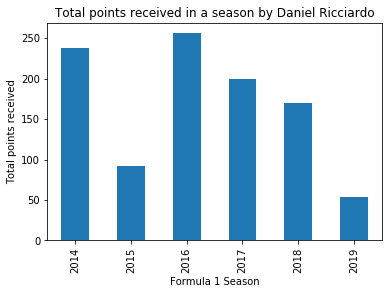

In [402]:
# Plot a bar plot to determine Ricciardo's best year in Formula 1
points_by_season.plot(kind='bar',legend=False)
plt.ylabel('Total points received')
plt.xlabel('Formula 1 Season')
plt.title("Total points received in a season by Daniel Ricciardo")

We can see clearly that Ricciardo's **best season was 2016 with Red Bull**, while his achievements in the 2014 season were nearly as good as in 2016. On the other hand, the **2019 season with Renault was his worst**.

## Most successful circuits

As previously, create a pivot table to group the data by circuit and compare average points scored per year.

In [383]:
# Create a dataframe using the pivot_table method
points_by_circuit = points.pivot_table(index='Circuit', aggfunc='mean')

# Remove the "Year" column from the dataframe
points_by_circuit.drop('Year', inplace=True, axis=1)
points_by_circuit.head(25)

,Points received
Circuit,
Abu Dhabi,9.000000
Australia,5.333333
Austria,5.000000
Azerbaijan,8.333333
Bahrain,7.000000
Belgium,9.666667
Brazil,5.333333
Britain,8.833333
Canada,11.000000


Let's determine Daniel's most successful circuits by plotting a pie chart of the data. Let's only plot the circuits where he received more points than his average and group the other circuits together, so the pie chart is easier to interpret.

In [384]:
# Create a variable holding mean points scored before we combine the rows with lower average scores
mean_circuit_points = points_by_circuit['Points received'].mean()

# Add a row that combines the circuits where the number of points received was lower than the average
points_by_circuit.loc['Other circuits'] = points_by_circuit['Points received'][points_by_circuit['Points received'] < points_by_circuit['Points received'].mean()].sum()

# Drop the rows with circuits that have a lower than average number of points scored
points_by_circuit.drop(points_by_circuit[points_by_circuit['Points received'] < mean_circuit_points].index, axis=0, inplace=True)

# Check that the rows were combined and removed
points_by_circuit.head(15)

,Points received
Circuit,
Abu Dhabi,9.000000
Azerbaijan,8.333333
Belgium,9.666667
Britain,8.833333
Canada,11.000000
China,11.500000
Hungary,11.166667
Malaysia,10.250000
Monaco,14.166667


Now we are ready to plot a pie chart of the data to determine Ricciardo's most successful circuits.

Text(0.5, 1.0, 'Average points received by Daniel Ricciardo per Grand Prix circuit')

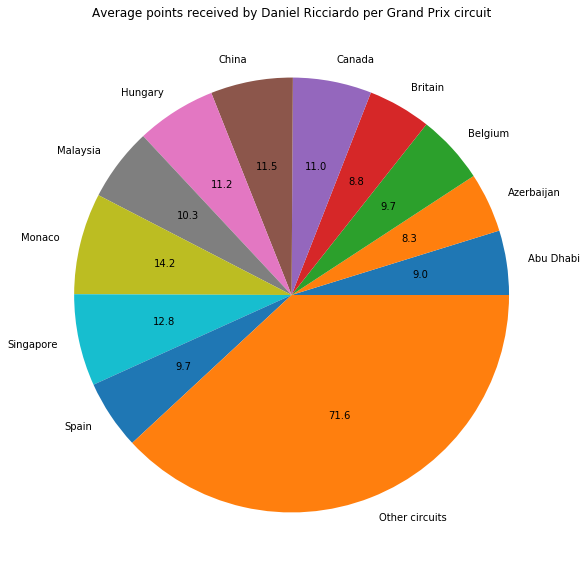

In [385]:
# Create a function that shows average points received per circuit on the pie chart
def absolute_value(val):
    a  = np.round(val/100.*points_by_circuit['Points received'].sum(), 1)
    return a

# Plot a pie chart
points_by_circuit.plot.pie(subplots=True, legend=False,autopct=absolute_value, figsize=(10, 10))

# Add a title and turn off the y-axis label
plt.ylabel('')
plt.title("Average points received by Daniel Ricciardo per Grand Prix circuit")

As we can see, on average Daniel received a similar number of points on most of the circuits over the span of his F1 career. However, his best performances were at **Monaco and Singapore**, with **14.2** and **12.8** points respectively.

Let's look closer at Daniel's performances at Monaco and Singapore to explore whether there is consistency in his good performance over the years. We will use bar plots for this as they make comparing the years very easy.

Text(0.5, 1.0, 'Points received by Daniel Ricciardo in Monaco')

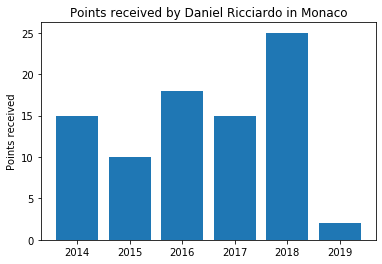

In [386]:
# First, create separate dataframes for only Monaco and Singapore circuits
points_monaco = points[points['Circuit'] == 'Monaco']
points_singapore = points[points['Circuit'] == 'Singapore']

# Plot a bar plot of points received in Monaco
plt.bar(x=points_monaco['Year'], height=points_monaco['Points received'])

#Add axis labels and the plot title
plt.ylabel('Points received')
plt.title('Points received by Daniel Ricciardo in Monaco')

Text(0.5, 1.0, 'Points received by Daniel Ricciardo in Singapore')

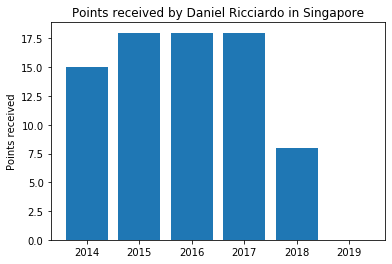

In [387]:
# Plot a bar plot of points recieved in Singapore
plt.bar(x=points_singapore['Year'], height=points_singapore['Points received'])

#Add axis labels and the plot title
plt.ylabel('Points received')
plt.title('Points received by Daniel Ricciardo in Singapore')

We can see Daniel's performances in both Grand Prix circuits were fairly consistent over the years, apart from in 2019, when he scored very few points in both races. One explanation to this might be his leave from Red Bull to Renault. As seen before, it looks like Daniel performed better when he was racing for Red Bull.

## Best performances in Qualifying

Let's investigate around which circuits Daniel is the fastest during Qualifying. It would be the most convenient to visualise such information using pie charts.

First let's look at the dataset and exclude Circuits for which there are fewer than 3 data points.

In [388]:
qualifying['Circuit'].value_counts()

Britain       6
Australia     6
Bahrain       6
Singapore     6
Monaco        6
USA           6
Austria       6
Hungary       6
China         6
Russia        6
Spain         6
Canada        6
Italy         6
Abu Dhabi     6
Japan         6
Belgium       6
Brazil        6
Mexico        5
Germany       4
Malaysia      4
Azerbaijan    3
France        2
Europe        1
Name: Circuit, dtype: int64

Let's exclude the European and French Grand Prixs.

In [389]:
# Remove the required rows
qualifying.drop(qualifying[qualifying['Circuit'] == 'Europe'].index,inplace=True, axis=0)
qualifying.drop(qualifying[qualifying['Circuit'] == 'France'].index,inplace=True, axis=0)

In [390]:
# Again use the pivot_table method to group the data by circuits
qualifying_mean_positions = qualifying.pivot_table(index='Circuit', aggfunc='mean')

#Drop the "Year" column
qualifying_mean_positions.drop('Year', inplace=True, axis=1)

# Reset index
qualifying_mean_positions.reset_index(inplace=True)
qualifying_mean_positions.head()

,Circuit,Qualifying position
0,Abu Dhabi,4.500000
1,Australia,7.000000
2,Austria,9.333333
3,Azerbaijan,8.666667
4,Bahrain,5.333333


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

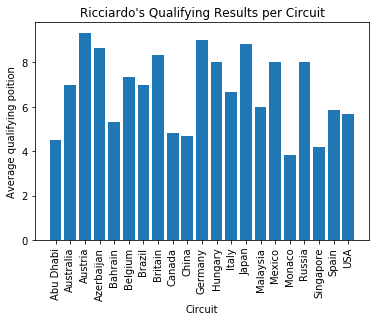

In [391]:
plt.bar(qualifying_mean_positions['Circuit'], qualifying_mean_positions['Qualifying position '])

# Add axis labels, plot title and rotate x-axis ticks
plt.xlabel('Circuit')
plt.ylabel('Average qualifying poition')
plt.title("Ricciardo's Qualifying Results per Circuit")
plt.xticks(rotation='90')

One important thing to note is that the lower the height of a bar, the better the qualifying perfomance is (this means that the starting position is closer to the front). Taking this into account, we can see that Ricciardo's best qualifying positions are at **Monaco and Singapore**. This might explain why Monaco and Singapore are also his most successful circuits of the season as having a better starting position helps a lot to perform well during the Grand Prix. Let's explore this relationship further.

## Correlation between qualifying position and points received in a race

In [392]:
# Create a fresh dataframe of mean points received in a race
mean_points = points.pivot_table(index='Circuit', aggfunc='mean')

# Drop the "Year" column and reset index
mean_points.drop('Year', inplace=True, axis=1)
mean_points.reset_index(inplace=True)

#Drop the rows with French and European Grand Prixs to be consistent with the qualifying dataframe
mean_points.drop(mean_points[mean_points['Circuit'] == 'Europe'].index,inplace=True, axis=0)
mean_points.drop(mean_points[mean_points['Circuit'] == 'France'].index,inplace=True, axis=0)

Correlation coefficient:  -0.611


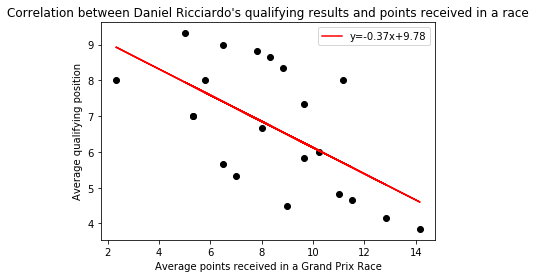

In [393]:
# Import the module which we will use to plot the regression line
from scipy import stats

# Define the variables of the best-fit line
x = mean_points['Points received']
y = qualifying_mean_positions['Qualifying position ']

# Fit the data to the regression line and calculate the parametres of the line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot the data points
plt.scatter(x, y, c='black')

# Plot the regression line (equation for the line is y = slope * x + intercept)
plt.plot(x, slope*x + intercept, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Show the equation for the best-fit line in the legend
plt.legend()

#Add axis labels and a title
plt.xlabel('Average points received in a Grand Prix Race')
plt.ylabel('Average qualifying position')
plt.title("Correlation between Daniel Ricciardo's qualifying results and points received in a race")

# Display the value of the correlation coefficient
print('Correlation coefficient: ', round(r_value, 3))

We observe that there is a moderate negative correlation between the variables. Therefore, there might be a relationship between qualifying position and points received in a Grand Prix race: the higher the starting position, the more points Daniel is likely to get in a race.

## Using Machine Learning to Predict Ricciardo's Performance

We will use the **sklearn** Python library to construct our model. This library is easy to use as we don't actually have to write the algorithms for predicting the data, we just have to import them from the library. We will split the data into two sets:
- **train** dataset  -- the one model uses to train upon
- **validation** dataset -- data that is held back from the model that we will use to estimate model accuracy
The moel will then attempt to predict the values in the validation dataset, and by calculating the errors between predicted and actual values we will obtain an estimate of accuracy of the model.

### 1. K-Nearest Neighbors Model

K-Nearest Neighbors is an algorithm that computes the Euclidean distances to a number of data points (nearest neighbors) and averages them to predict an unseen value. 

In [394]:
# Import the required modules for the model
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

Let's use 2019 data as the validation (test) dataset, and the rest of the data as the train dataset. Since we want to predict the points scored in a given race, we can use the other columns as the features that the model will learn from. First of all, we need to convert the "Circuit" column to numerical types. We will do this with the help of dummy variables.

In [395]:
# Create a dataframe of dummy variables
points_ml = points.copy()
circuit_dummies = pd.get_dummies(points_ml['Circuit'])

# Combine the dummy variables dataframe with the main dataframe
points_ml = pd.concat([points_ml, circuit_dummies], axis=1)
points_ml.head()

,Year,Circuit,Points received,Team,Abu Dhabi,Australia,Austria,Azerbaijan,Bahrain,Belgium,...,Hungary,Italy,Japan,Malaysia,Mexico,Monaco,Russia,Singapore,Spain,USA
0,2014,Australia,0,Red Bull,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,Malaysia,0,Red Bull,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2014,Bahrain,12,Red Bull,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,China,12,Red Bull,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,Spain,15,Red Bull,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Next, let's perform the train/test split of the data.

In [396]:
train_df = points_ml[points_ml['Year'] != 2019]
test_df = points_ml[points_ml['Year'] == 2019]

In [397]:
# Columns we want to train the model on
features = points_ml.columns[4:].tolist()
features.append('Year')

# Columns we want the model to predict
labels = ['Points received']

Now let's feed the model with the train dataset and let it predict the values in the test dataset. The metric we will use to determine model accuracy is **root mean squared error (RMSE)**, which takes the mean of the difference between actual and predicted values squared and then calculates the square root of it.

In [398]:
knn = KNeighborsRegressor()

# Train the model on the train dataset
knn.fit(train_df[features], train_df[labels])

# Tell the model to predict the values in the test dataset
predictions = knn.predict(test_df[features])

# Calculate rmse
rmse = np.sqrt(mean_squared_error(test_df[labels], predictions))
print('RMSE is ', round(rmse,2))

RMSE is  7.67


The RMSE metric is quite low, which indicates that the model should be fairly accurate with its predictions. Let's plot both actual and predicted values to validate this claim.

Text(0.5, 1.0, "K-Nearest Neighbors Model's predictions about Ricciardo's 2019 F1 season")

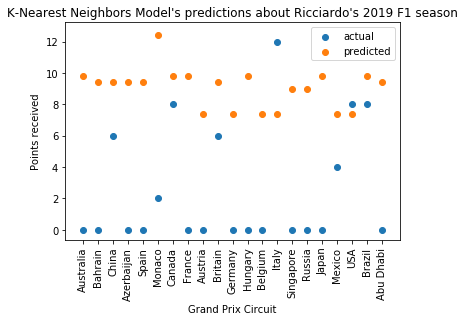

In [399]:
# Plot the actual (true) data
plt.scatter(test_df['Circuit'], test_df[labels], label='actual')

#Plot the data predicted by the model
plt.scatter(test_df['Circuit'], predictions, label='predicted')

# Rotate x-axis ticks, add a legend, title and labels
plt.xticks(rotation = '90')
plt.legend()
plt.xlabel("Grand Prix Circuit")
plt.ylabel('Points received')
plt.title("K-Nearest Neighbors Model's predictions about Ricciardo's 2019 F1 season")

We observe that the model overestimates Daniel's performance for most of the circuits. However, some predictions are really close, such as for the US, Brazilian and Canadian Grand Prix. One issue with the model's predictions might be that 2019 was the year Daniel has switched to Renault where, as we know from our previous analysis, his performance was worse than at Redbull. The model couldn't expect the drop in points received in 2019 based on the previous years, where average amount of points received per race was higher. Let's now try another model and see if it performs better.

### 2. Random Forest Regressor Model

Random Forest is another algorithm we will use to predict the points received by Ricciardo. This algorithm is based on decision trees, where every predicted data point is given a value by "answering" a True/False question and moving along the decision trees of a "forest" before arriving at a final value.

In [400]:
# Import the algorithm from the sklearn library
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Train the model
rf.fit(train_df[features], train_df[labels])

# Make predictions
predictions_rf = rf.predict(test_df[features])

# Calculate errors
err_rmse = np.sqrt(mse(test_df[labels], predictions_rf))
print('RMSE', err_rmse)

RMSE 8.187587876663995


 RMSE is low for the Random Forest model as well. This model might make good predictions about the data. Let's visualise actual and predicted values.

Text(0.5, 1.0, "Random Forest Model's predictions about Ricciardo's 2019 F1 season")

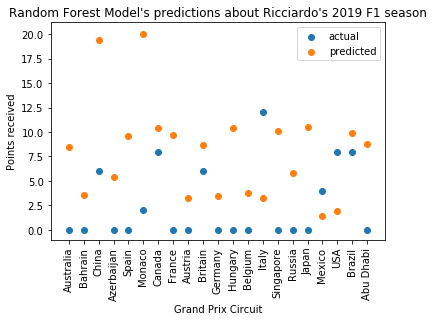

In [401]:
# Plot the actual (true) data
plt.scatter(test_df['Circuit'], test_df[labels], label='actual')

#Plot the data predicted by the model
plt.scatter(test_df['Circuit'], predictions_rf, label='predicted')

# Rotate x-axis ticks, add a legend, title and labels
plt.xticks(rotation = '90')
plt.legend()
plt.xlabel("Grand Prix Circuit")
plt.ylabel('Points received')
plt.title("Random Forest Model's predictions about Ricciardo's 2019 F1 season")

We observe that the model predicts a lower value for the mean points received in 2019 than K-Nearest Neighbors as the predicted points are lower for nearly every circuit. The model overestimates significantly the points received at Monaco, China, Singapore and Japan, among others. However, it does make good predictions for Brazil, Mexico and Canada.

# Conclusion

In this project, we have successfully analysed the performance of Formula 1 driver Daniel Ricciardo. We have found out that:
- **2016 was his best season** at F1, with the 2014 season being very close in terms of total points received.
- Daniel's performance didn't exactly improve over the course of his career. This is likely due to his team switch to Renault.
- **Monaco and Singapore** are his most successfull circuits, with consistently good performance over the years apart from the 2019 season.
- Ricciardo's best qualifying results are at **Monaco and Singapore**. This links to him performing well around these tracks during a Grand Prix.
- There is a **moderate negative correlation** between Daniel Ricciardo's qualifying results and points received in a Grand Prix race.


We have also developed **two machine learning models**, which both produced satisfactory predictions about his 2019 season, based on the data from the previous years. The models were:
- **K-Nearest Neighbors** -- overestimated the performance in 2019 and predicted a higher number of points received for many circuits than the actual points received.
- **Random Forest** -- overestimated the points for some of the circuits, but produced more accurate predictions than the other model.

The Random Forest algorithm is likely **the better model for the data**.